In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Desativar o SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # Desativa os avisos

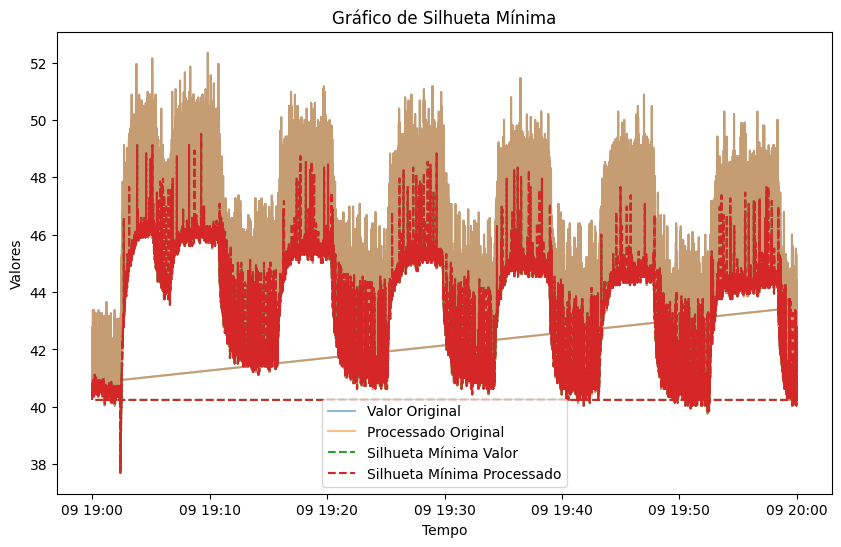

In [20]:
# Leia o arquivo CSV
df = pd.read_csv('planta.csv', sep=',', encoding='utf-8')

# Converta a coluna 'Tempo' para datetime
df['Tempo'] = pd.to_datetime(df['Tempo'])

# Filtrar apenas as colunas 'Tempo', 'Valor' e 'Processado'
df_filtered = df[['Tempo', 'Valor', 'Processado']]

# Converta as colunas 'Valor' e 'Processado' para numérico
df_filtered['Valor'] = pd.to_numeric(df_filtered['Valor'], errors='coerce')
df_filtered['Processado'] = pd.to_numeric(df_filtered['Processado'], errors='coerce')

# Aplicar o filtro de mínimos (mínimos móveis) com uma janela de tamanho 5 (ou ajuste conforme necessário)
df_filtered['Silhueta_Minima_Valor'] = df_filtered['Valor'].rolling(window=5, min_periods=1).min()
df_filtered['Silhueta_Minima_Processado'] = df_filtered['Processado'].rolling(window=5, min_periods=1).min()

# Plotar os dados originais e a silhueta mínima
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Tempo'], df_filtered['Valor'], label='Valor Original', alpha=0.5)
plt.plot(df_filtered['Tempo'], df_filtered['Processado'], label='Processado Original', alpha=0.5)
plt.plot(df_filtered['Tempo'], df_filtered['Silhueta_Minima_Valor'], label='Silhueta Mínima Valor', linestyle='--')
plt.plot(df_filtered['Tempo'], df_filtered['Silhueta_Minima_Processado'], label='Silhueta Mínima Processado', linestyle='--')
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Gráfico de Silhueta Mínima')
plt.legend()
plt.show()


In [13]:
# Leia o arquivo CSV
df = pd.read_csv('planta.csv', sep=',', encoding='utf-8')

# Converta a coluna 'Tempo' para datetime
df['Tempo'] = pd.to_datetime(df['Tempo'])

# Filtrar os dados a partir de 19:10:00
df_filtered = df[df['Tempo'] >= '2024-09-09 19:10:00']

# Salvar o novo CSV com os dados filtrados
df_filtered.to_csv('arquivo_filtrado.csv', sep=',', index=False)

print("Dados anteriores a 19:10:00 removidos e novo CSV salvo como 'arquivo_filtrado.csv'.")


Dados anteriores a 19:10:00 removidos e novo CSV salvo como 'arquivo_filtrado.csv'.


In [5]:
# Função para calcular a silhueta mínima a partir de um CSV de entrada e gerar um novo CSV de saída
def salvar_valores_minimos(input_csv, output_csv):
    # Ler o arquivo CSV de entrada
    df = pd.read_csv(input_csv, sep=',', encoding='utf-8')

    # Remover a coluna 'Processado' se ela existir
    if 'Processado' in df.columns:
        df = df.drop(columns=['Processado'])
    
    # Converter a coluna 'Tempo' para datetime se ainda não estiver
    df['Tempo'] = pd.to_datetime(df['Tempo'])
    
    # Converta a coluna 'Valor' para numérico
    df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
    
    # Calcular a silhueta mínima com uma janela de 10
    df['Silhueta_Minima_Valor'] = df['Valor'].rolling(window=10, min_periods=1).min()
    
    # Filtrar apenas os valores mínimos (silhueta mínima)
    df_minimos = df[['Tempo', 'Silhueta_Minima_Valor']].copy()

    # Renomear a coluna para algo mais claro
    df_minimos.rename(columns={'Silhueta_Minima_Valor': 'Valor'}, inplace=True)

    # Salvar em um novo arquivo CSV
    df_minimos.to_csv(output_csv, index=False)
    print(f'Arquivo {output_csv} gerado com sucesso.')

# Exemplo de chamada da função com o arquivo CSV de entrada e saída
salvar_valores_minimos('planta_2.csv', 'planta_3.csv')

Arquivo planta_3.csv gerado com sucesso.


In [19]:
# Função para remover outliers com base no IQR (Interquartile Range)
def remover_outliers_iqr(df, column_name):
    # Calcular os quartis (Q1 e Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir limites para identificar outliers
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    # Filtrar os dados dentro dos limites (remover outliers)
    df_sem_outliers = df[(df[column_name] >= lim_inf) & (df[column_name] <= lim_sup)]
    
    return df_sem_outliers

# Função para abrir o CSV, remover outliers, calcular os mínimos e salvar em novos arquivos para os intervalos fornecidos
def gerar_csv_intervalos_minimos(csv_file, intervalos):
    # Abrir o CSV
    df = pd.read_csv(csv_file, sep=',', encoding='utf-8')
    
    # Converter a coluna 'Tempo' para datetime
    df['Tempo'] = pd.to_datetime(df['Tempo'])
    
    # Iterar sobre cada intervalo e gerar um CSV com os mínimos
    for i, (start_time_str, end_time_str, title) in enumerate(intervalos):

        # Converter os tempos de string para datetime
        start_time = pd.to_datetime(start_time_str)
        end_time = pd.to_datetime(end_time_str)
        
        # Filtrar os dados no intervalo de tempo
        df_filtered = df[(df['Tempo'] >= start_time) & (df['Tempo'] <= end_time)].copy()
        
        # Remover outliers
        # df_filtered = remover_outliers_iqr(df_filtered, 'Valor')
        
        # Calcular a silhueta mínima
        df_filtered['Silhueta_Minima_Valor'] = df_filtered['Valor'].rolling(window=10, min_periods=1).min()
        
        # Filtrar apenas os valores mínimos (silhueta mínima)
        df_minimos = df_filtered[['Tempo', 'Silhueta_Minima_Valor']].copy()
        
        # Renomear a coluna para algo mais claro
        df_minimos.rename(columns={'Silhueta_Minima_Valor': 'Valor'}, inplace=True)
        
        # Gerar nome do arquivo CSV
        csv_filename = f'intervalo_{i+1}_{title}_minimos.csv'
        
        # Salvar o DataFrame filtrado como CSV
        df_minimos.to_csv(csv_filename, index=False)
        
        print(f'Arquivo {csv_filename} gerado com sucesso.')

# Lista dos intervalos fornecidos
# intervalos = [
#     ("2024-09-09 19:10:00", "2024-09-09 19:15:00", 'Exponencial_de_Queda_1'),
#     ("2024-09-09 19:19:00", "2024-09-09 19:24:00", 'Exponencial_de_Queda_2'),
#     ("2024-09-09 19:28:00", "2024-09-09 19:33:00", 'Exponencial_de_Queda_3'),
#     ("2024-09-09 19:37:00", "2024-09-09 19:42:00", 'Exponencial_de_Queda_4'),
#     ("2024-09-09 19:47:00", "2024-09-09 19:52:00", 'Exponencial_de_Queda_5')
# ]

intervalos = [
    ("2024-09-09 19:14:00", "2024-09-09 19:19:00", 'Exponencial_de_Ascensao_1'),
    ("2024-09-09 19:23:00", "2024-09-09 19:28:00", 'Exponencial_de_Ascensao_2'),
    ("2024-09-09 19:32:00", "2024-09-09 19:37:00", 'Exponencial_de_Ascensao_3'),
    ("2024-09-09 19:41:00", "2024-09-09 19:46:00", 'Exponencial_de_Ascensao_4'),
    ("2024-09-09 19:51:00", "2024-09-09 19:56:00", 'Exponencial_de_Ascensao_5')
]

# Exemplo de chamada da função com o arquivo CSV
gerar_csv_intervalos_minimos('planta_3.csv', intervalos)

Arquivo intervalo_1_Exponencial_de_Ascensao_1_minimos.csv gerado com sucesso.
Arquivo intervalo_2_Exponencial_de_Ascensao_2_minimos.csv gerado com sucesso.
Arquivo intervalo_3_Exponencial_de_Ascensao_3_minimos.csv gerado com sucesso.
Arquivo intervalo_4_Exponencial_de_Ascensao_4_minimos.csv gerado com sucesso.
Arquivo intervalo_5_Exponencial_de_Ascensao_5_minimos.csv gerado com sucesso.


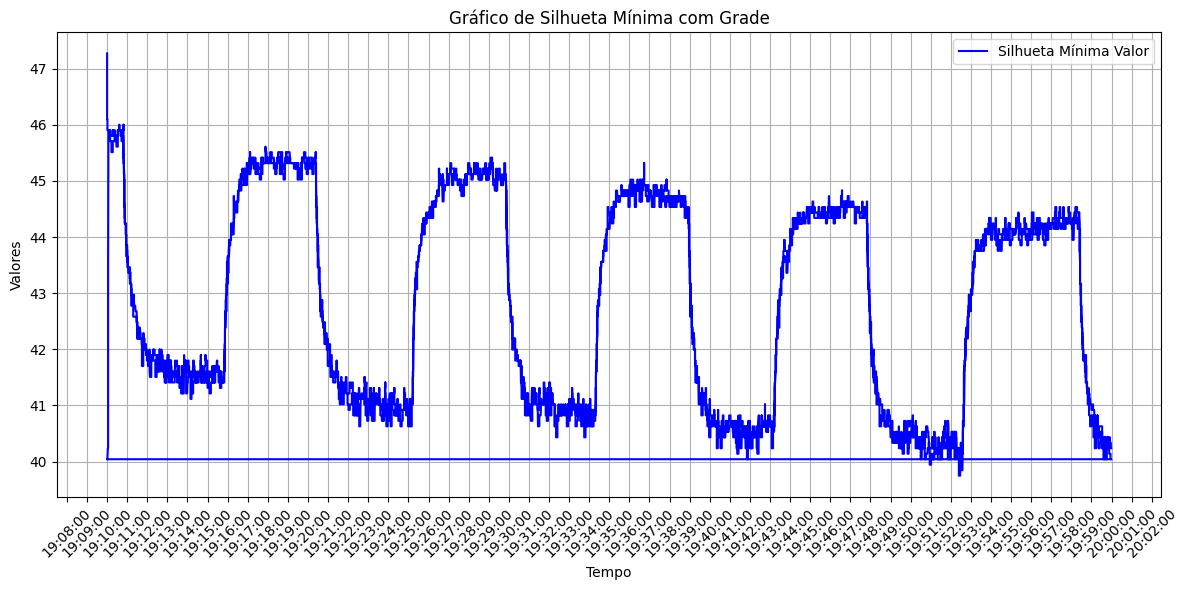

In [7]:
# Leia o arquivo CSV (supondo que o arquivo seja o mesmo)
df = pd.read_csv('planta_3.csv', sep=',', encoding='utf-8')

# Converta a coluna 'Tempo' para datetime
df['Tempo'] = pd.to_datetime(df['Tempo'])

# Filtrar apenas as colunas 'Tempo', 'Valor' e 'Processado'
df_filtered = df[['Tempo', 'Valor']]

# Converta as colunas 'Valor' e 'Processado' para numérico
df_filtered['Valor'] = pd.to_numeric(df_filtered['Valor'], errors='coerce')

# Aplicar o filtro de mínimos móveis (ajuste a janela conforme necessário)
df_filtered['Silhueta_Minima_Valor'] = df_filtered['Valor'].rolling(window=10, min_periods=1).min()

# Plotar apenas as silhuetas mínimas
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Tempo'], df_filtered['Silhueta_Minima_Valor'], label='Silhueta Mínima Valor', color='blue')

# Definir os major ticks no eixo x a cada 1 minuto
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Ajustar o grid para mais precisão
plt.xticks(rotation=45)  # Rotaciona os labels do eixo x para maior legibilidade

# Adicionar títulos e labels
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Gráfico de Silhueta Mínima com Grade')

# Adicionar a grid ao gráfico
plt.grid(True)

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()


<h1 style="color:white; font-weight:bold;">Exponenciais decrescentes</h1>

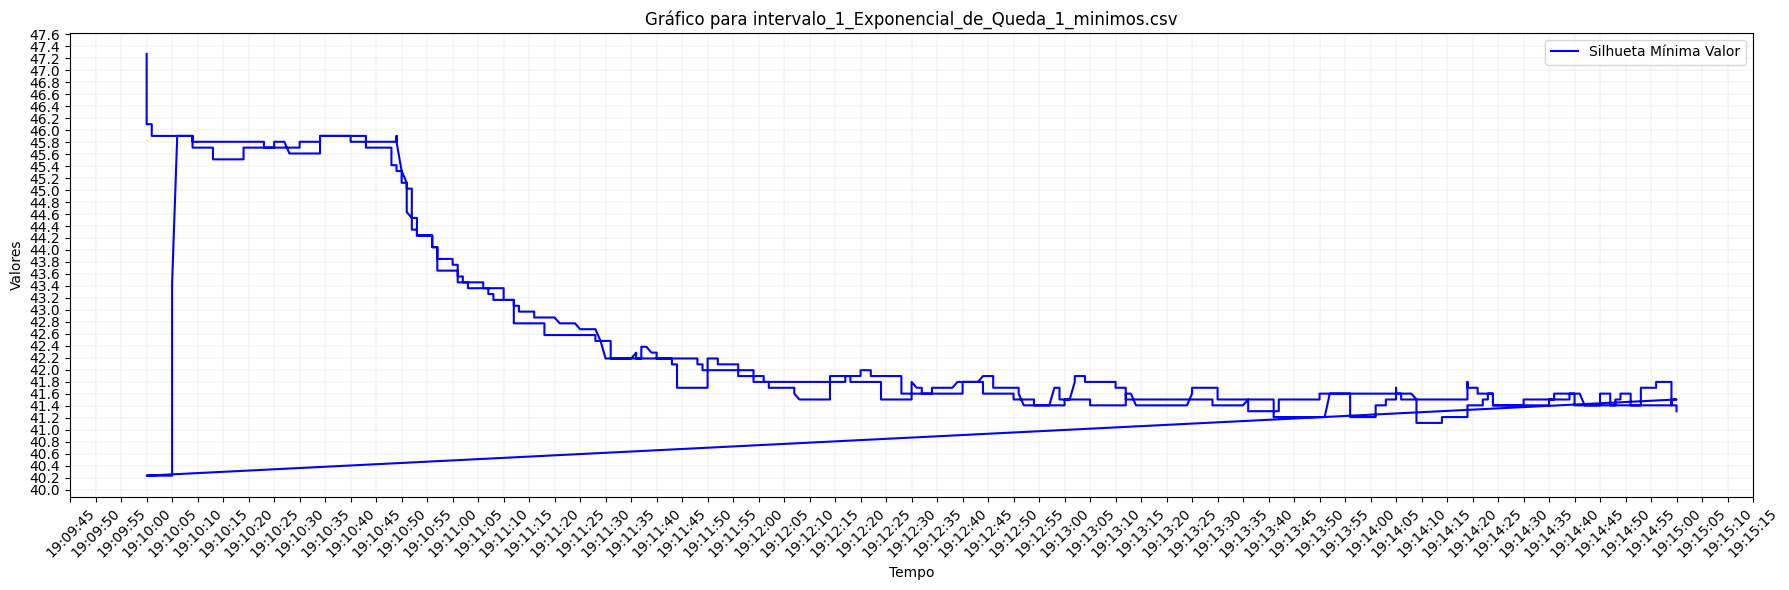

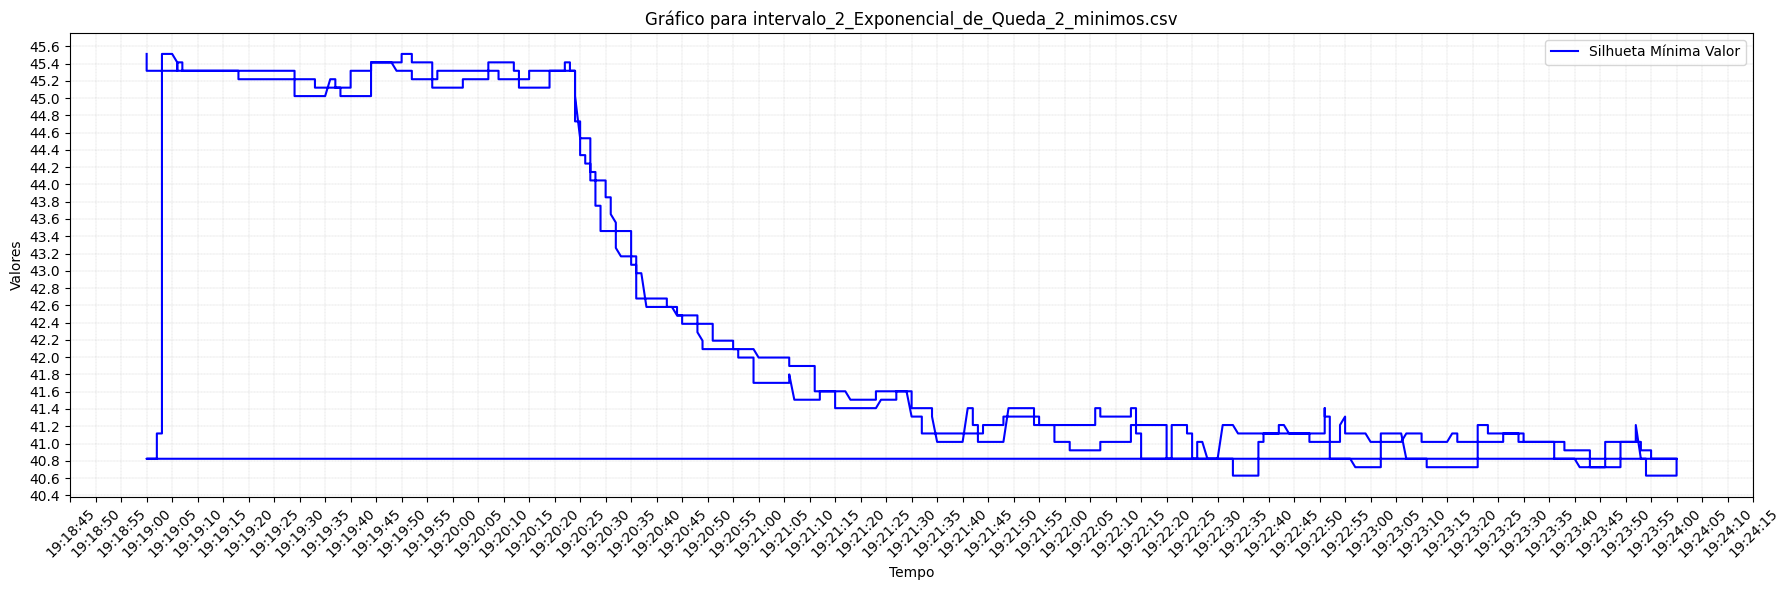

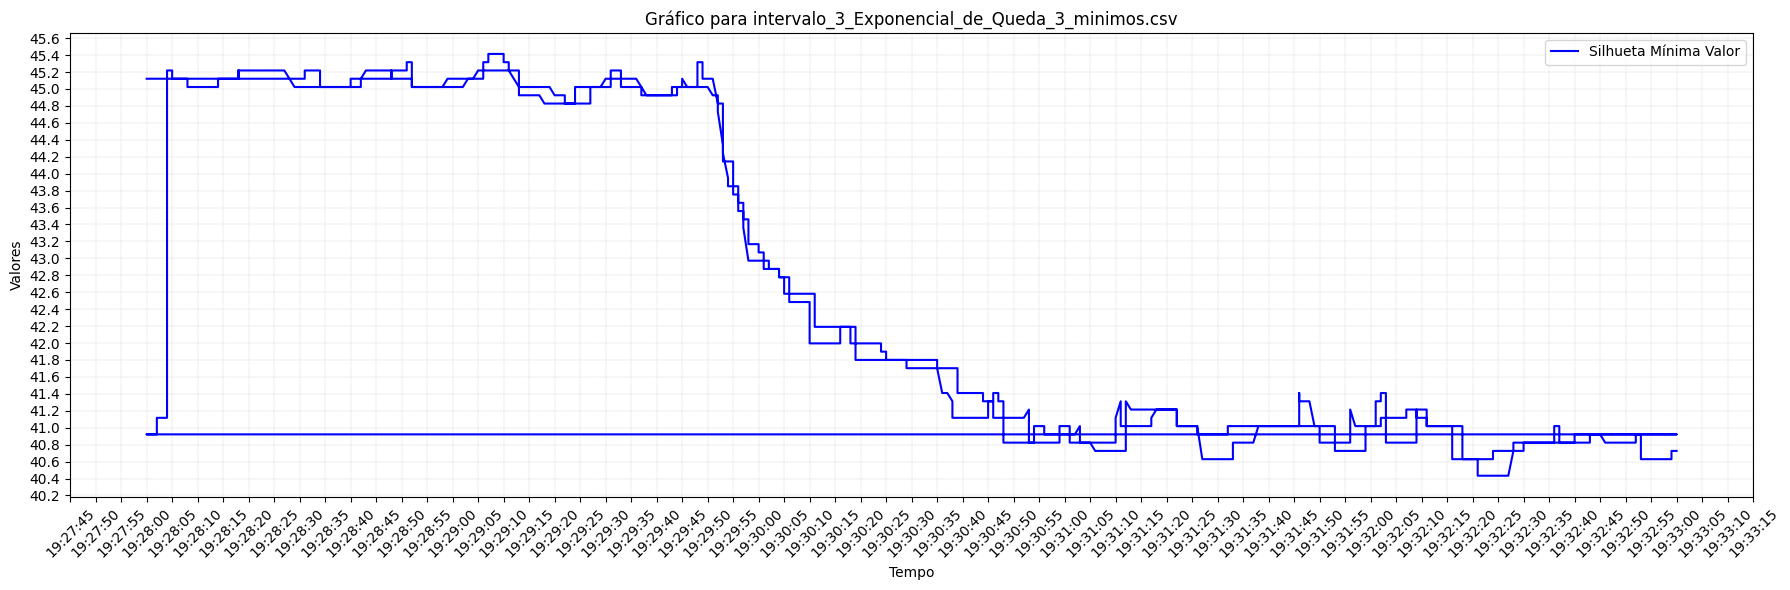

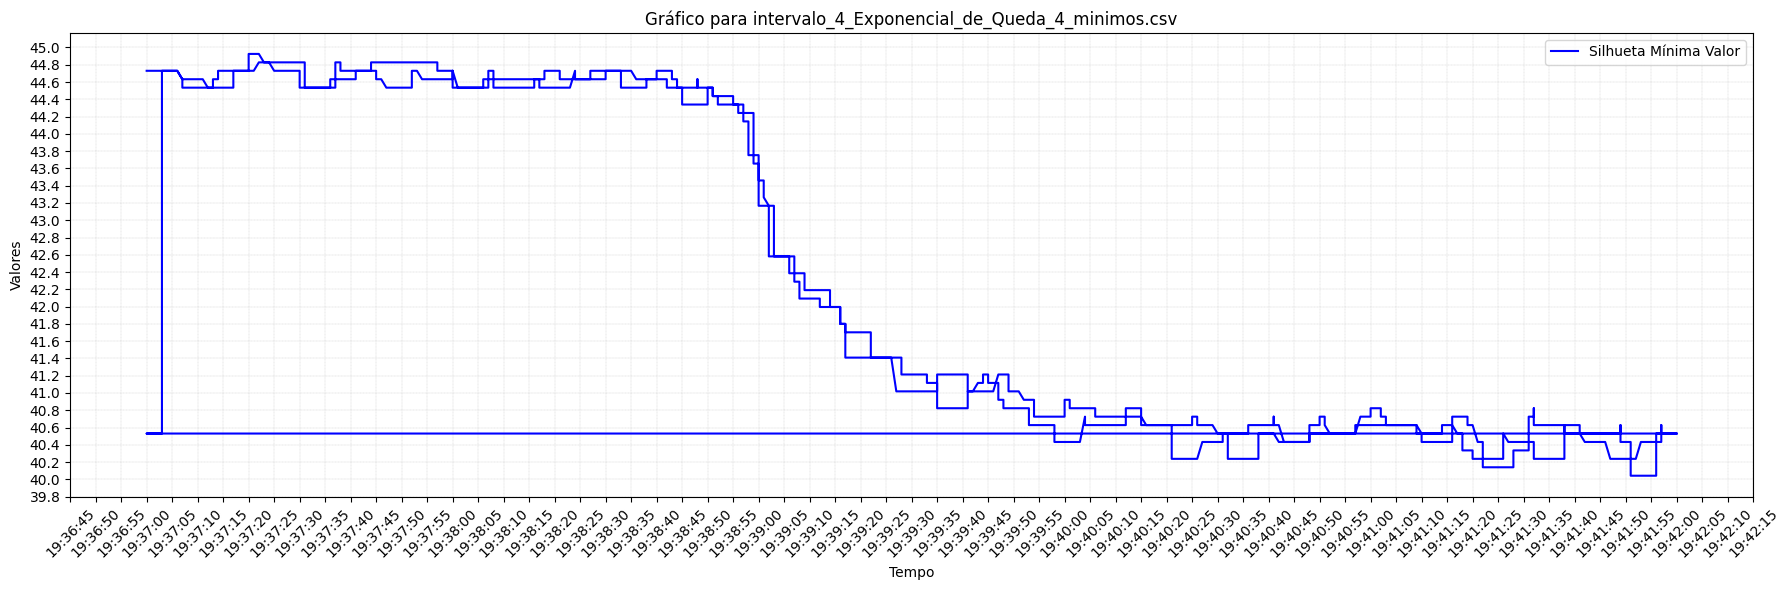

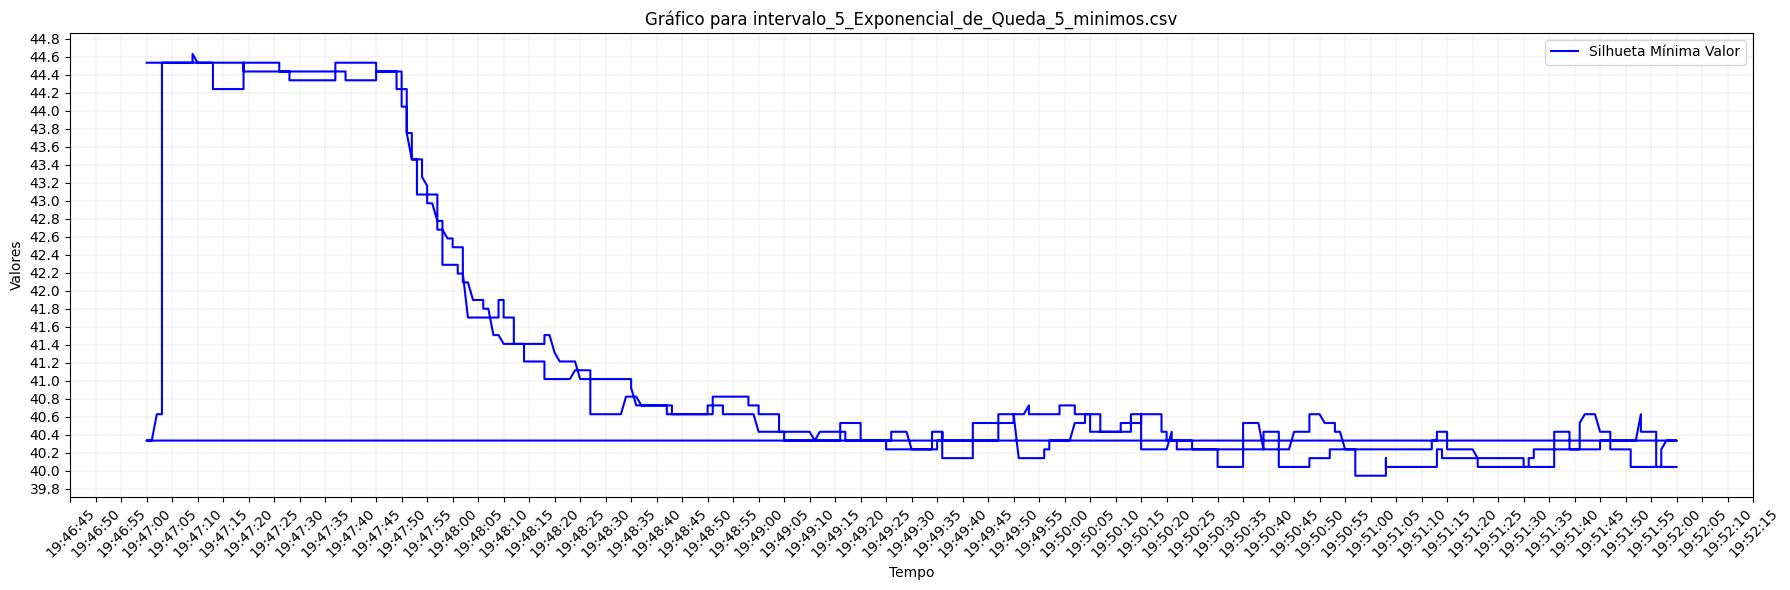

In [18]:

# Função para filtrar os dados
def filter_data(df):
    df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
    return df

# Função para plotar o gráfico
def plot_exponential_fall(df_filtered, title):
    # Aplicar o filtro de mínimos móveis
    df_filtered['Silhueta_Minima_Valor'] = df_filtered['Valor'].rolling(window=10, min_periods=1).min()

    # Plotar o gráfico
    plt.figure(figsize=(18, 6))
    plt.plot(df_filtered['Tempo'], df_filtered['Silhueta_Minima_Valor'], label='Silhueta Mínima Valor', color='blue')

    # Definir os major ticks no eixo x para linhas verticais a cada 10 segundos
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Rotacionar e ajustar a fonte dos labels no eixo X
    plt.xticks(rotation=45, fontsize=10)

    # Ajustar o grid para mais linhas horizontais
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.2)

    # Ajustar o eixo y para mais linhas horizontais (grid)
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))  # Aqui você ajusta a densidade das linhas horizontais

    # Adicionar títulos e labels
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.title(title)

    # Adicionar a legenda
    plt.legend()

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Função para abrir cada CSV fornecido e processar
def processar_csvs(arquivos_csv):
    # Para cada arquivo CSV
    for csv_file in arquivos_csv:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file, sep=',', encoding='utf-8')
        
        # Converter a coluna 'Tempo' para datetime
        df['Tempo'] = pd.to_datetime(df['Tempo'])
        
        # Filtrar os dados
        df_filtered = filter_data(df)
        
        # Plotar o gráfico
        plot_exponential_fall(df_filtered, f'Gráfico para {csv_file}')

# Lista de arquivos CSV fornecidos
arquivos_csv = [
    'intervalo_1_Exponencial_de_Queda_1_minimos.csv',
    'intervalo_2_Exponencial_de_Queda_2_minimos.csv',
    'intervalo_3_Exponencial_de_Queda_3_minimos.csv',
    'intervalo_4_Exponencial_de_Queda_4_minimos.csv',
    'intervalo_5_Exponencial_de_Queda_5_minimos.csv'
]

# Chamar a função para processar e plotar os CSVs
processar_csvs(arquivos_csv)


<h1 style="color:white; font-weight:bold;">Exponenciais Crescentes</h1>

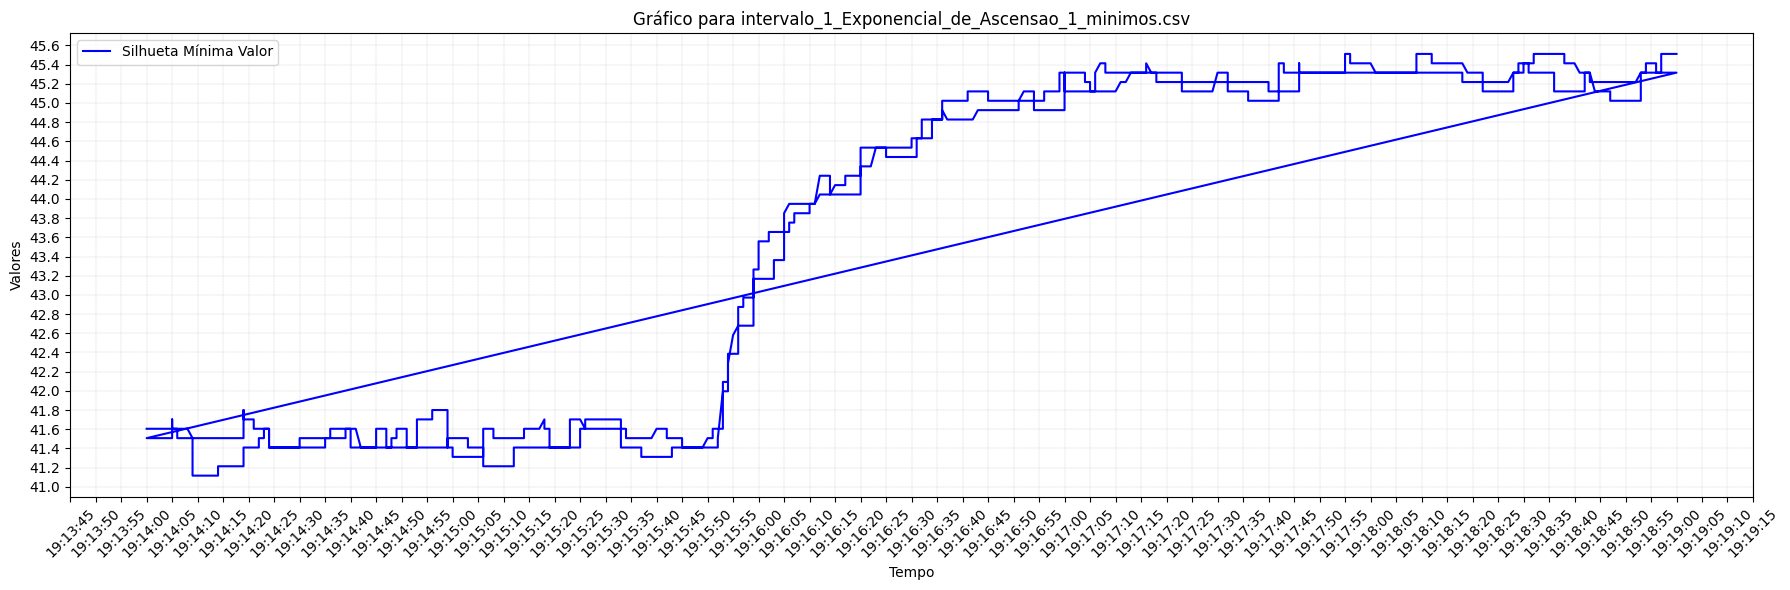

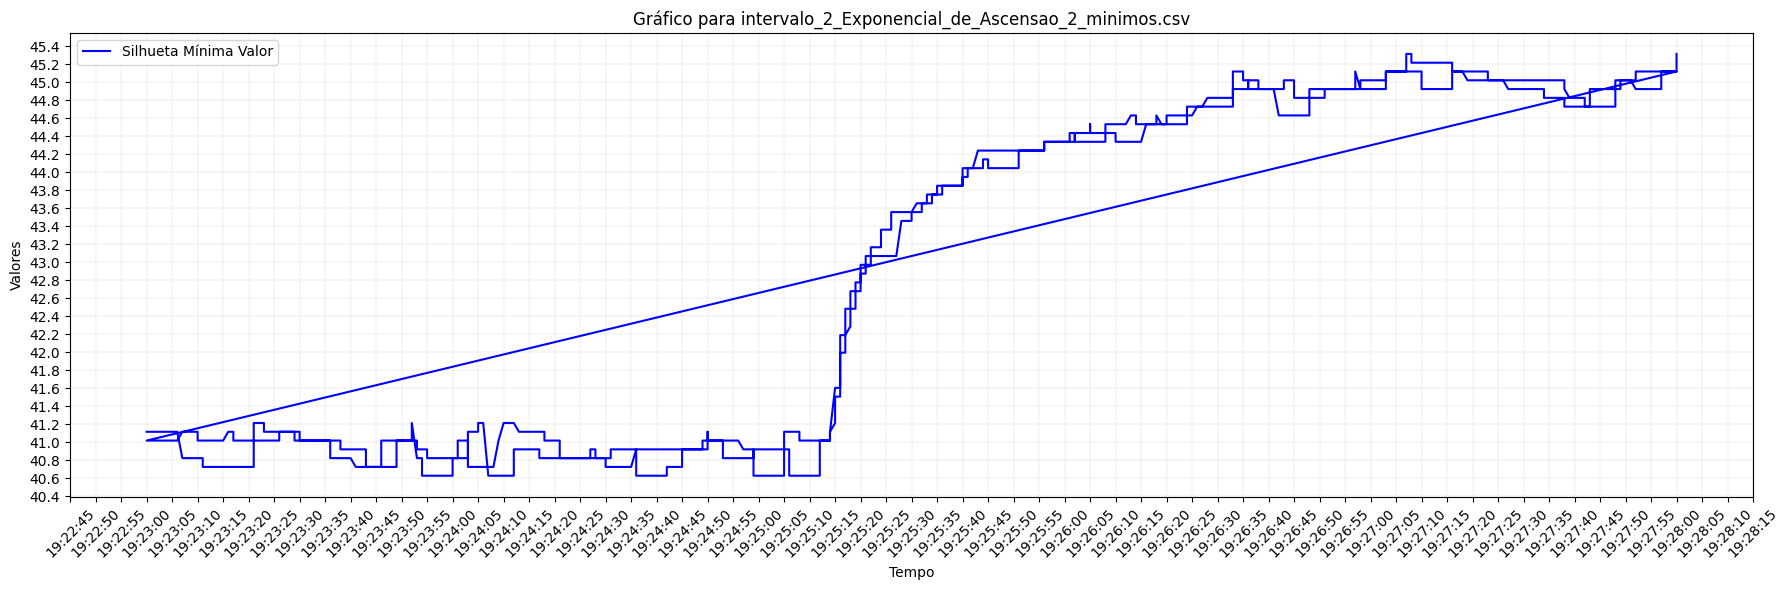

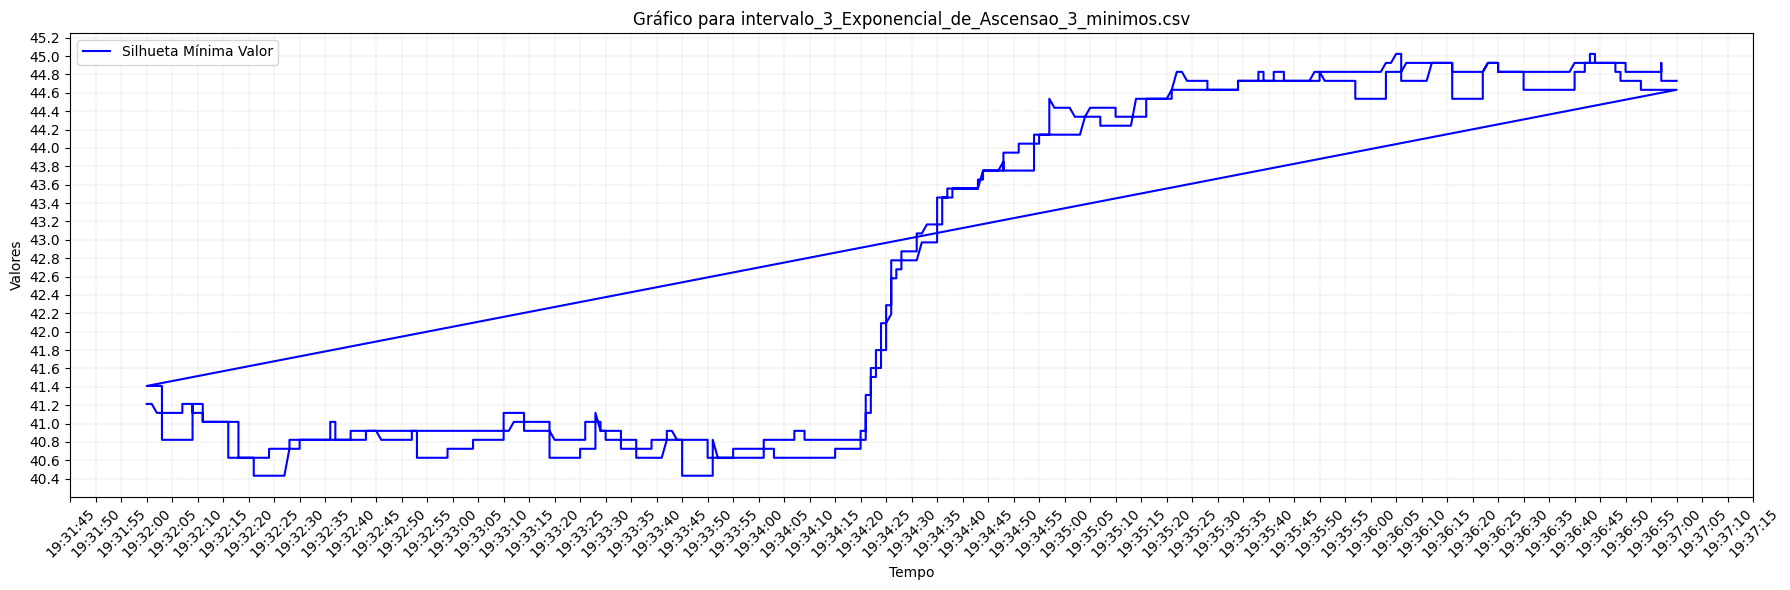

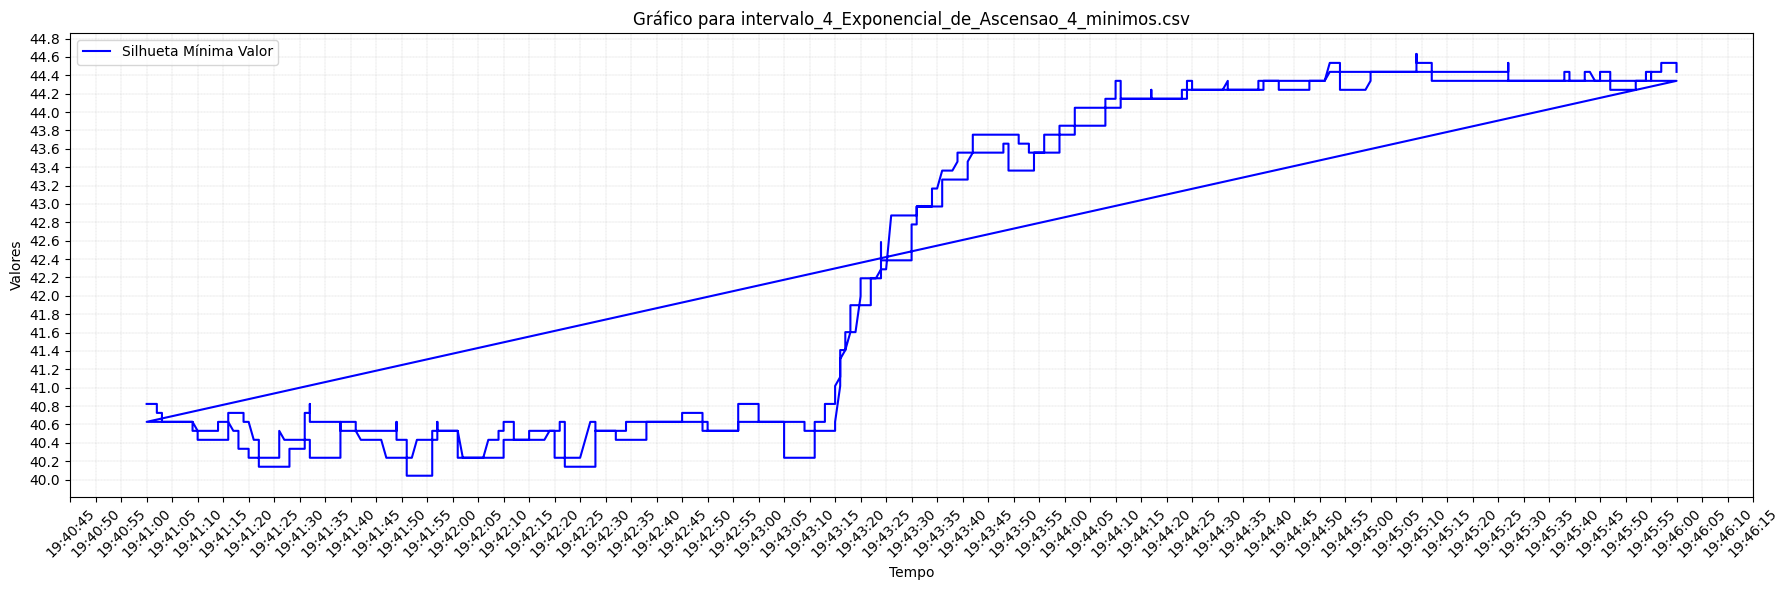

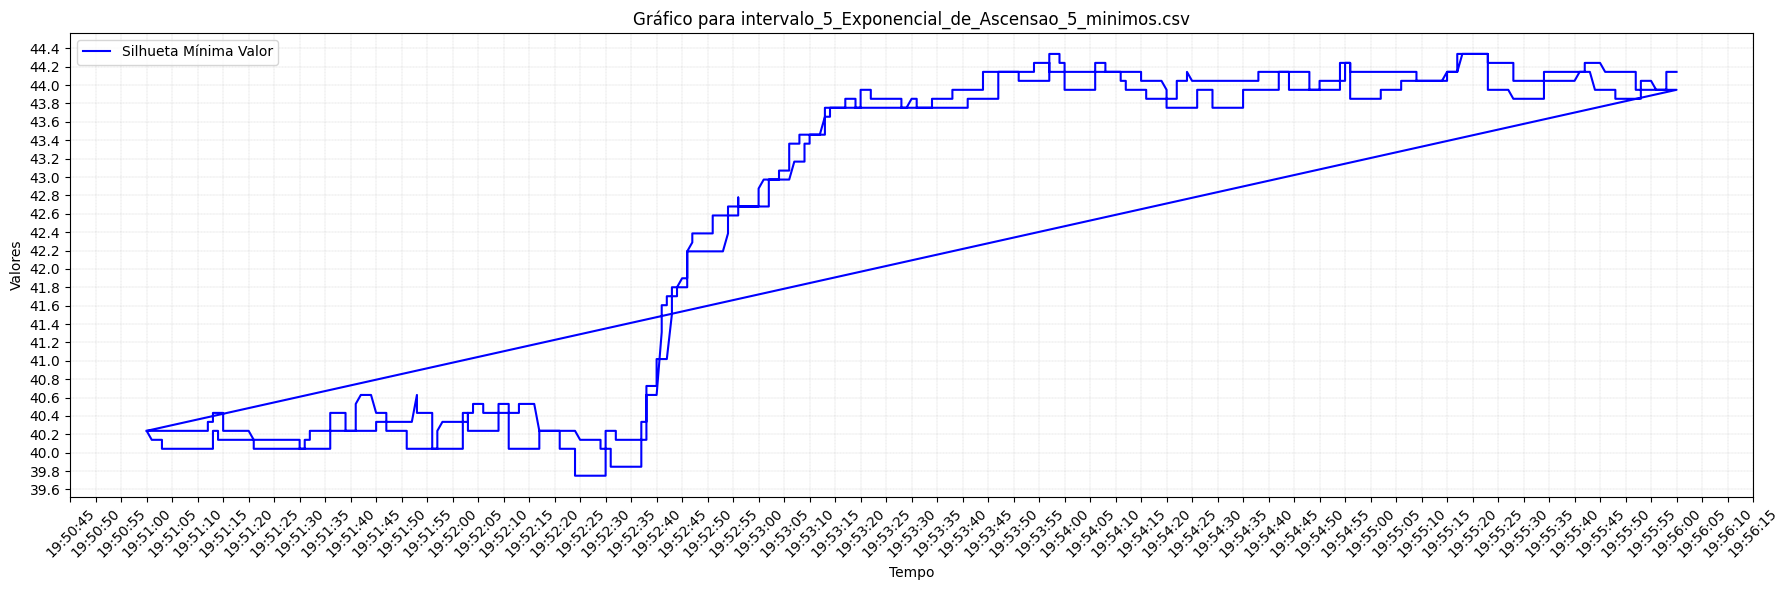

In [20]:
# Função para filtrar os dados
def filter_data(df):
    df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
    return df

# Função para plotar o gráfico
def plot_exponential_fall(df_filtered, title):
    # Aplicar o filtro de mínimos móveis
    df_filtered['Silhueta_Minima_Valor'] = df_filtered['Valor'].rolling(window=10, min_periods=1).min()

    # Plotar o gráfico
    plt.figure(figsize=(18, 6))
    plt.plot(df_filtered['Tempo'], df_filtered['Silhueta_Minima_Valor'], label='Silhueta Mínima Valor', color='blue')

    # Definir os major ticks no eixo x para linhas verticais a cada 10 segundos
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Rotacionar e ajustar a fonte dos labels no eixo X
    plt.xticks(rotation=45, fontsize=10)

    # Ajustar o grid para mais linhas horizontais
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.2)

    # Ajustar o eixo y para mais linhas horizontais (grid)
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))  # Aqui você ajusta a densidade das linhas horizontais

    # Adicionar títulos e labels
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.title(title)

    # Adicionar a legenda
    plt.legend()

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Função para abrir cada CSV fornecido e processar
def processar_csvs(arquivos_csv):
    # Para cada arquivo CSV
    for csv_file in arquivos_csv:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file, sep=',', encoding='utf-8')
        
        # Converter a coluna 'Tempo' para datetime
        df['Tempo'] = pd.to_datetime(df['Tempo'])
        
        # Filtrar os dados
        df_filtered = filter_data(df)
        
        # Plotar o gráfico
        plot_exponential_fall(df_filtered, f'Gráfico para {csv_file}')

# Lista de arquivos CSV fornecidos
arquivos_csv = [
    'intervalo_1_Exponencial_de_Ascensao_1_minimos.csv',
    'intervalo_2_Exponencial_de_Ascensao_2_minimos.csv',
    'intervalo_3_Exponencial_de_Ascensao_3_minimos.csv',
    'intervalo_4_Exponencial_de_Ascensao_4_minimos.csv',
    'intervalo_5_Exponencial_de_Ascensao_5_minimos.csv'
]

# Chamar a função para processar e plotar os CSVs
processar_csvs(arquivos_csv)
